<a href="https://colab.research.google.com/github/ShakyHaris/Shakyy/blob/main/Copy_of_Assignment_2_Machine_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2 - introduction to Machine learning (15%, due 19th Oct 11.59 pm.)
Train, test, and evaluate multiple machine learning models and techniques to solve each specific problem.

1. [5%] Task 1 - Regression
2. [5%] Task 2 - Classification
3. [5%] Task 3 - Text Classification
---


Please submit your colab worksheet to google classroom by 19th Oct 11.59 pm. Late submission will deduct 1% per day. ***Pycaret is not allowed***

## Task 1: Regression

Train a regression model to predict the burnt calories based on the Calories-Exercise dataset. Use all necessary techniques to train a regression model that performs with a mean absolute error equal to or lesser than 9 calories. You are free to choose how to preprocess data, transform columns, and split datasets.


- Q1: What features do you use to achieve this goal? How do you process it?
- Q2: Plot the graph to show the important feature based on the coefficients(weights) of a trained linear regression model.
- Q3: How do you explain the relationship between features and target variables(Calories) based on coefficient?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 74)
pd.set_option('display.width', 500)


!gdown 1kyS5sVY4_UEP55Me349GT43S7hA5fDOU
!gdown 150C3IHQ7aBceATpKLasrSlFrsjZWucTi

df_exercise = pd.read_csv('/content/exercise.csv')
df_calories = pd.read_csv('/content/calories.csv')

print(df_exercise)
print(df_calories)

Downloading...
From: https://drive.google.com/uc?id=1kyS5sVY4_UEP55Me349GT43S7hA5fDOU
To: /content/exercise.csv
100% 677k/677k [00:00<00:00, 45.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=150C3IHQ7aBceATpKLasrSlFrsjZWucTi
To: /content/calories.csv
100% 230k/230k [00:00<00:00, 65.5MB/s]
        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4
14996  17212577  female   27   165.0    65.0       6.0        85.0       3

Coefficients:
Age: 0.4997
Height: -0.1767
Weight: 0.2905
Duration: 6.6356
Heart_Rate: 1.9937
Body_Temp: -17.1771
Gender_male: -1.2884
Intercept: 471.8494
Mean Squared Error: 8.233431693409408
R-squared: 0.9669875664346873


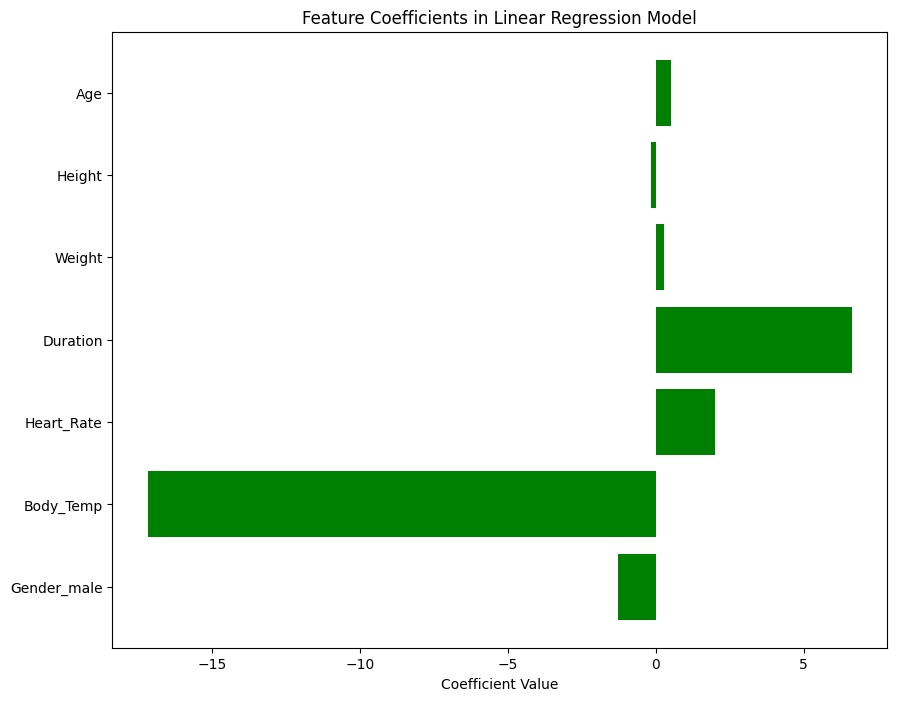

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

df_all = pd.merge(df_exercise, df_calories, on='User_ID')
y = df_all['Calories']
x = df_all
x = x.drop(columns=['User_ID','Calories'])

y = pd.DataFrame({'Calories':y})
#one hot dummy
x = pd.get_dummies(x, columns=['Gender'], drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.1, random_state= 42)

from scipy import stats
z_scores = np.abs(stats.zscore(X_train))
threshold = 3 #only extreme ones
outlier = (z_scores>threshold).any(axis=1) #zscore>3 for any data, the whole row will be removed
x_train_no_outliers = X_train[outlier == False]
y_train_no_outliers = y_train[outlier == False]
lr = LinearRegression()
lr.fit(x_train_no_outliers, y_train_no_outliers)

y_predLR = lr.predict(X_test)

coefficients = lr.coef_
intercept = lr.intercept_

# Get the feature names after one-hot encoding
feature_names = X.columns

print("Coefficients:")
for feature, coef in zip(feature_names, coefficients[0]):
    print(f"{feature}: {float(coef):.4f}")
print(f"Intercept: {float(intercept):.4f}")
print("Mean Squared Error:",mean_absolute_error(y_test,y_predLR))
r2 = r2_score(y_test, y_predLR)
print("R-squared:", r2)

plt.figure(figsize=(10, 8))
plt.barh(feature_names, coefficients[0], color='green')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients in Linear Regression Model')
plt.gca().invert_yaxis()

plt.show()

## Task 2: Classification
Train a machine learning model to help us predict the sex (Male, Female, and Infant) of an abalone. Here is the [detail](https://archive.ics.uci.edu/dataset/1/abalone) to the dataset. Use all necessary techniques to train classification models in sklearn. You are free to choose how to preprocess data, transform columns, and split datasets.

Q4: create a pair-plot from Seaborn to help us understand this dataset where hue is "Type."

Q5:  choose at least 3 Multiclass classification algorithms from [this](https://scikit-learn.org/stable/modules/multiclass.html). Compare the F1-score performance on each algorithm.

Q6: Perform a feature selection with [Chi-Sqaure score](https://saturncloud.io/blog/sklearn-chi2-for-feature-selection-a-comprehensive-guide-for-data-scientists/) where we only select the top 3 features from the Chi-Sqaure score to train the model.

Q6.1: What are the top 3 features based on the Chi-Sqaure score?

Q6.2: Do you observe any difference between a model trained with all features and a model trained?

Q6.3: what can we infer about the power of predictability of the top 3 features on this dataset?

In [ ]:
!gdown 1RysTtIgmqZdMh2ioutL9b46NqZVjw06N

df_abalone = pd.read_csv('/content/abalone.csv')
print(df_abalone)
print(df_abalone.info())

Downloading...
From: https://drive.google.com/uc?id=1RysTtIgmqZdMh2ioutL9b46NqZVjw06N
To: /content/abalone.csv
100% 217k/217k [00:00<00:00, 106MB/s]
     Type  LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  ShellWeight  Rings
0       M         0.455     0.365   0.095       0.5140         0.2245         0.1010       0.1500     15
1       M         0.350     0.265   0.090       0.2255         0.0995         0.0485       0.0700      7
2       F         0.530     0.420   0.135       0.6770         0.2565         0.1415       0.2100      9
3       M         0.440     0.365   0.125       0.5160         0.2155         0.1140       0.1550     10
4       I         0.330     0.255   0.080       0.2050         0.0895         0.0395       0.0550      7
...   ...           ...       ...     ...          ...            ...            ...          ...    ...
4172    F         0.565     0.450   0.165       0.8870         0.3700         0.2390       0.2490     11
4173    M  

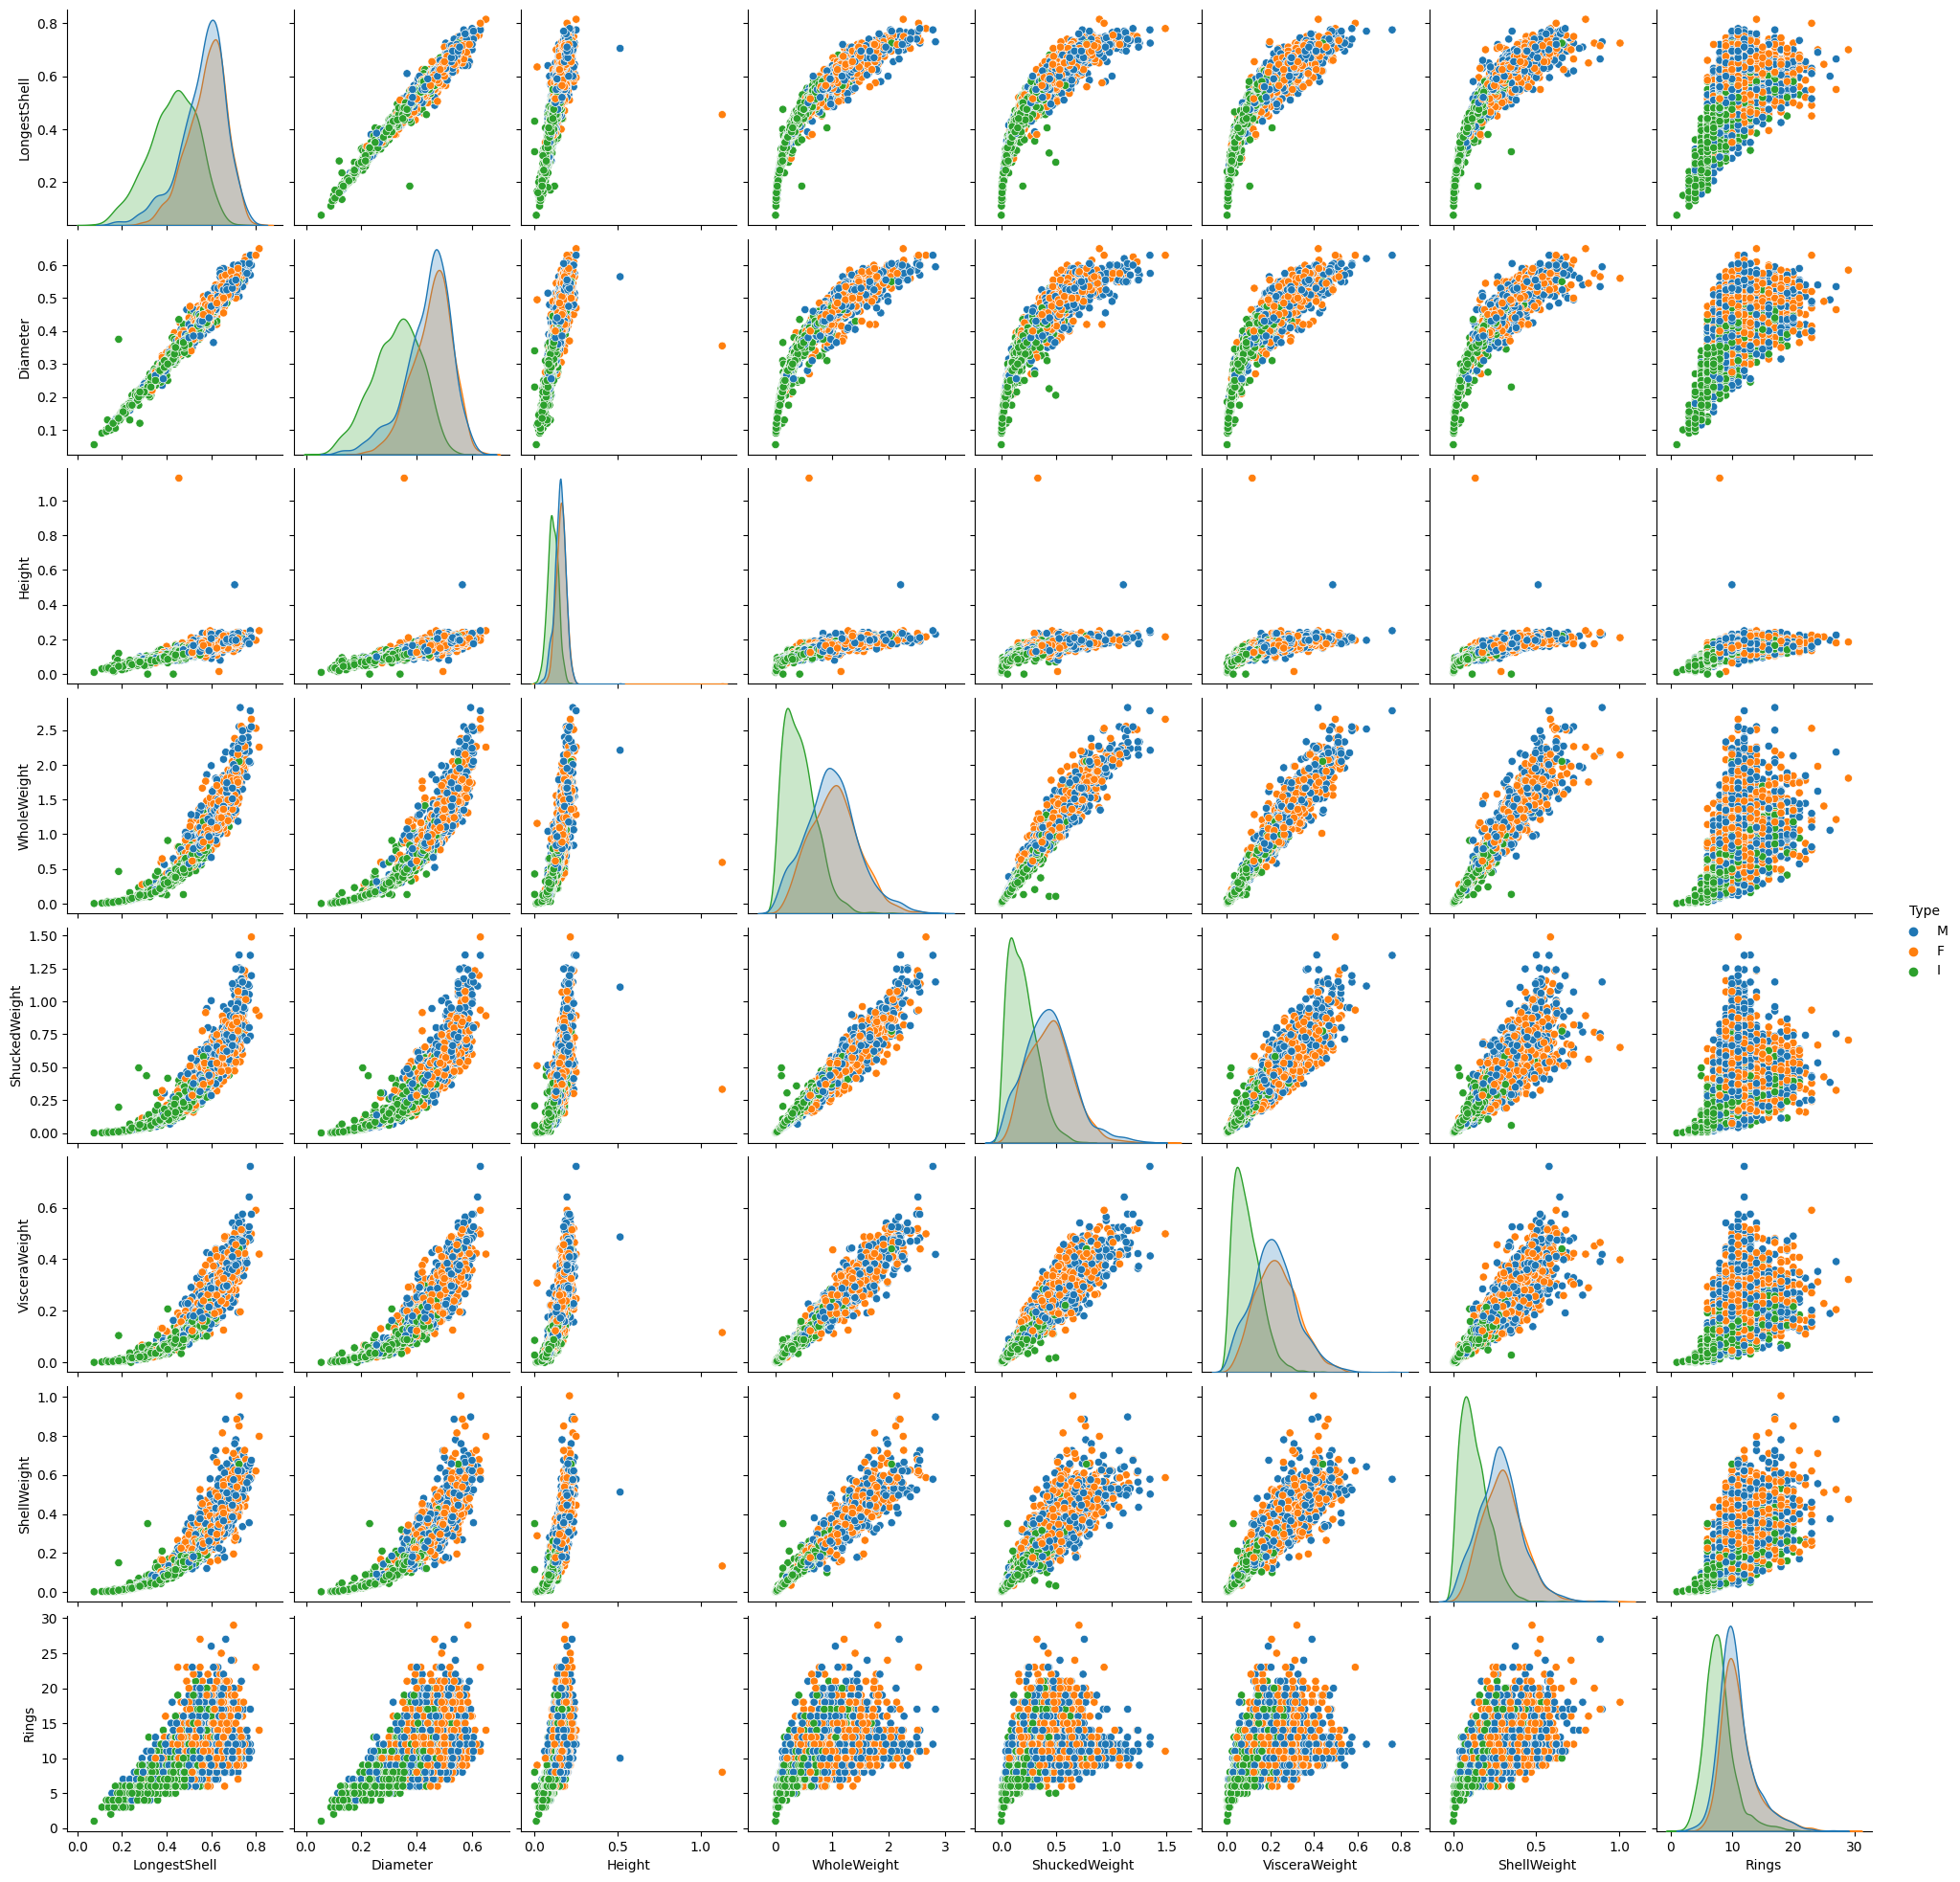

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns
#Q4
sns.pairplot(df_abalone, hue="Type")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
#Q5
X = df_abalone.drop(['Type'],axis=1)
y = df_abalone['Type']
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

#Onevsrest
OneVsRest = OneVsRestClassifier(LinearSVC(dual=False, random_state=42))
OneVsRest.fit(X_train,y_train)
y_predOvr = OneVsRest.predict(X_test)
Ovr = f1_score(y_test, y_predOvr, average='weighted')
print("OneVsRest f1",Ovr)

#Onevsone
OneVsOne = OneVsOneClassifier(LinearSVC(dual=False, random_state=42))
OneVsOne.fit(X_train,y_train)
y_predOvo = OneVsOne.predict(X_test)
Ovo = f1_score(y_test, y_predOvo, average='weighted')
print("OneVsOne f1",Ovo)

#Outputcode
OC = OutputCodeClassifier(LinearSVC(dual=False, random_state=42))
OC.fit(X_train,y_train)
y_predocc = OC.predict(X_test)
Oc = f1_score(y_test, y_predocc, average='weighted')
print("OutputCode f1",Oc)



2    1528
1    1342
0    1307
Name: Type, dtype: int64
OneVsRest f1 0.5421655610539872
OneVsOne f1 0.544465169532511
OutputCode f1 0.30816832654364584


In [ ]:
#Q6.1
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
chi2_select = SelectKBest(chi2, k=3)
X_train_chi2 = chi2_select.fit_transform(X_train, y_train)
X_test_chi2 = chi2_select.transform(X_test)
selected_feature_indices = chi2_select.get_support()
selected_features = X.columns[selected_feature_indices]
print("Top 3 features based on Chi-Square score:")
print(selected_features)

Top 3 features based on Chi-Square score:
Index(['WholeWeight', 'ShuckedWeight', 'Rings'], dtype='object')


In [ ]:
#Q6.2
#Onevsrest
OneVsRest = OneVsRestClassifier(LinearSVC(dual=False, random_state=42))
OneVsRest.fit(X_train_chi2,y_train)
y_predOvr = OneVsRest.predict(X_test_chi2)
Ovr = f1_score(y_test, y_predOvr, average='weighted')
print("OneVsRest f1",Ovr)
#Onevsone
OneVsOne = OneVsOneClassifier(LinearSVC(dual=False, random_state=42))
OneVsOne.fit(X_train_chi2,y_train)
y_predOvo = OneVsOne.predict(X_test_chi2)
ovo = f1_score(y_test, y_predOvo, average='weighted')
print("OneVsOne f1",ovo)

#Outputcode
OCC = OutputCodeClassifier(LinearSVC(dual=False, random_state=42))
OCC.fit(X_train_chi2,y_train)
y_predocc = OCC.predict(X_test_chi2)
oc = f1_score(y_test, y_predocc, average='weighted')
print("OutputCode f1",oc)


OneVsRest f1 0.512660750136583
OneVsOne f1 0.5172966726926167
OutputCode f1 0.28986842229465093


## Text classification
Train a machine learning model to help us predict the class of sentiment  (Positive, Neutral, and Negative) on Thai wisesight_sentiment [dataset](https://huggingface.co/datasets/wisesight_sentiment).

1. Tokenize and preprocess dataset with PythaiNLP [tokenize function](https://pythainlp.github.io/dev-docs/api/tokenize.html#).
2. Create 2 different feature vectors with 1) bag of words [link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and 2) TF-IDF [link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)   
3. Choose one of the models of multiclass classification on sklearn to train 2 different models, bag of word model and the TF-IDF model.
4. Report and compare 2 different models with weighted F1-score. Which model does perform better?    

In [ ]:
!pip install pythainlp
!pip install datasets
!pip install python-crfsuite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 7.7 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

dataset_name = 'wisesight_sentiment'
dataset = load_dataset(dataset_name)
#print(dataset)

train_dataset = pd.DataFrame(dataset['train'])
test_dataset = pd.DataFrame(dataset['test'])
#print(train_dataset)
#print(test_dataset)
#exclude category question
train_dataset = train_dataset[train_dataset['category'] != 3]
test_dataset = test_dataset[test_dataset['category'] != 3]

Labels =  { 0:"pos", 1:"neu",2: "neg"}
train_dataset["category"] = train_dataset["category"].apply(lambda x:Labels[x])
test_dataset["category"] = test_dataset["category"].apply(lambda x:Labels[x])
print(train_dataset["texts"].head())
print(test_dataset["texts"].head())

0    ไปจองมาแล้วนาจา Mitsubishi Attrage ได้หลังสงกร...
1    เปิดศักราชใหม่! นายกฯ แถลงข่าวก่อนการแข่งขันศึ...
2                             บัตรสมาชิกลดได้อีกไหมคับ
3                                  สนใจ new mazda2ครับ
4                                                   😍😍
Name: texts, dtype: object
0    ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...
1                                     ครับ #phithanbkk
2    การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...
3                                Cf clarins 5 ขวด 2850
4    ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...
Name: texts, dtype: object


In [ ]:
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from pythainlp.corpus.common import thai_stopwords
from pythainlp import word_tokenize
stop = list(thai_stopwords())
import re
#1
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[0-9a-zA-Z()?\:/#!@%*+-]+', '', text)
    cleaned_text = "".join(char for char in text if char not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ", "_"))
    tokenized_text = word_tokenize(cleaned_text)
    filtered_text = " ".join(word for word in tokenized_text if word not in stop)
    return filtered_text

train_dataset['cleaned_text'] = train_dataset['texts'].apply(preprocess_text)
display(train_dataset)
test_dataset['cleaned_text'] = test_dataset['texts'].apply(preprocess_text)
display(test_dataset)
#2.1
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
bag = CountVectorizer()
X_train_bag = bag.fit_transform(train_dataset['cleaned_text'])
X_test_bag = bag.transform(test_dataset['cleaned_text'])
#2.2
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(train_dataset['cleaned_text'])
X_test_tfidf = tfidf.transform(test_dataset['cleaned_text'])
#3 and 4
y = train_dataset['category']
y_test = test_dataset['category']
OneVsOne = OneVsOneClassifier(LinearSVC(dual=False, random_state=42))
OneVsOne.fit(X_train_bag,y)
y_predbag = OneVsOne.predict(X_test_bag)
baggy = f1_score(y_test, y_predbag, average='weighted')
print("OneVsOne bag f1",baggy)

y = train_dataset['category']
y_test = test_dataset['category']
OneVsOne = OneVsOneClassifier(LinearSVC(dual=False, random_state=42))
OneVsOne.fit(X_train_tfidf,y)
y_predtfidf = OneVsOne.predict(X_test_tfidf)
tfidfyea = f1_score(y_test, y_predtfidf, average='weighted')
print("OneVsOne tfidf f1",tfidfyea)


,texts,category,cleaned_text
0,ไปจองมาแล้วนาจา Mitsubishi Attrage ได้หลังสงกร...,neu,จอง แล้ วนา จา สงกรานต์ รอ ขับ นา จา ก...
1,เปิดศักราชใหม่! นายกฯ แถลงข่าวก่อนการแข่งขันศึ...,neu,ศักราช นายก แถลงข่าว การแข่งขัน ศึก ช้าง...
2,บัตรสมาชิกลดได้อีกไหมคับ,neu,บัตรสมาชิก ลด ไหม คับ
3,สนใจ new mazda2ครับ,neu,สนใจ
4,😍😍,pos,😍😍
...,...,...,...
21623,ไม่ค่อยอยากกินเล๊ย💘,pos,กิน เล๊ย💘
21624,คิดถึงแม่รุ้งอีกแล้ว,pos,คิดถึง แม่ รุ้ง อีกแล้ว
21625,วันนี้อะไปลองมาละบลัช 4u2 สีที่จะเอาหมดอีก โอย...,neg,อะ ลอง บลัช สี ที่จะ โอย ชุ้นคง บุญ
21626,ตัวอยู่พฤกษาใจไปแสนสิริ5555555,neu,ตัว พฤกษา ใจ แสน สิริ


,texts,category,cleaned_text
0,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...,neg,ซื้อ ผ้าอนามัย เย็น อี ห่า นอน
1,ครับ #phithanbkk,neu,
2,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...,neg,ด่า เหมือน บรรเทา ความเครียด บีทีเอส รถไฟฟ...
3,Cf clarins 5 ขวด 2850,neu,ขวด
4,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...,neu,ทาน น้ำ ซุป ต้ม มาจาก หัวผักกาด ซีอิ้ว ...
...,...,...,...
2666,เล็กลงมา แต่ดีเท่าเดิม 😘 แวะมาหาได้ที่เซเว่นน๊...,pos,ลงมา ดี เท่าเดิม 😘 แวะ มาหา เซเว่น น๊า ...
2667,แพนด้าซิ่ง กับมุมมองที่แตกต่างอย่างลงตัวในสไตล...,neu,แพนด้า ซิ่ง มุมมอง แตกต่าง ลงตัว สไตล์
2668,ไปเถอะดอม,pos,ดอม
2669,เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555,neu,เจมส์ บอนด์ ขับ โตโยต้า อัลติส


OneVsOne bag f1 0.622747727396397
OneVsOne tfidf f1 0.6406899695519127
